# *Método de la Golden Section y método de Brent*
### Johan Sebastian Leal Toro
### Universidad del Valle, Cali

El método de la sección dorada permite encontrar el mínimo de una función unimodal mediante reducciones sucesivas del rango en el cual se encuentra este valor. Su nombre se le atribuye debido a que el algoritmo mantiene los valores de la función en tríos de puntos cuyas distancias forman una *proporción dorada*. Por otro lado el método de Brent realiza una interpolación con tres puntos no colineales de la función dada para obtener una aproximación a esta por medio de una parábola.

Haciendo uso de la librería de scipy.optimize se realiza el siguiente programa que ejecuta los métodos mencionados.

## Librerías importadas y Funciones

In [ ]:
#Importamos los paquetes para realizar el programa
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tabulate import tabulate

Seguidamente debemos definir un arreglo de puntos equidistantes en un intervalo dado, llamamos $x$ a este arreglo de puntos. Definimos también un par de funciones con las que se quiera trabajar, para este caso en específico tomaremos las siguientes funciones:
$$f(x)=x^2$$
$$g(x)=(x-x_{0})^{2}+\frac{1}{e^{5(x+0,7-x_{0})^{2}}}$$
donde $x_{0}=\frac{1}{e}$.

In [ ]:
x = np.linspace(-1, 1, 100)
x0 = np.exp(-1)

def f(x):
    return (x)**2

def g(x):
    return (x-x0)**2 + np.exp(-5*(x +0.7 - x0)**2)

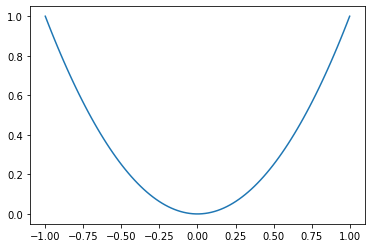

In [ ]:
#Gráfica de la función f(x)
plt.plot(x, f(x))

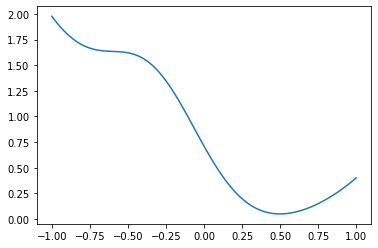

In [ ]:
#Gráfica de la función g(x)
plt.plot(x, g(x))

## Aplicación de los métodos

Aplicando entonces el comando optimize.minimize_scalar podemos hallar e imprimir el resultado del método aplicado que será mostrado en el siguiente orden:
1. (fun) corresponde al valor de la función evaluada en el punto mínimo hallado.
2. (nfev) corresponde al número de evaluaciones en la función que realizó el optimizador.
3. (nit) corresponde al número de iteraciones realizadas.
4. (success) indica si el procedimiento llegó con éxito o no al mínimo de la función en el intervalo dado.
5. (x) es el correspondiente a la coordenada horizontal del punto mínimo de la función. 

In [ ]:
#Método de Golden Section
resultado1 = optimize.minimize_scalar(g, (-1, 1), method='golden')
resultado1

     fun: 0.04881756741099316
    nfev: 46
     nit: 41
 success: True
       x: 0.49915535877361183

In [ ]:
#Método de Brent
resultado2 = optimize.minimize_scalar(g, (-1, 1), method='brent')
resultado2

     fun: 0.048817567410993135
    nfev: 15
     nit: 11
 success: True
       x: 0.4991553654010445

## Iteraciones

En caso de necesitar el resultado para un número de iteraciones fijas (iter= valor fijo) podemos añadir esta condición agregando el comando options={"maxiter": iter} dentro del comando optimize. Si lo que necesitamos es conocer el resultado para cada una de las iteraciones realizadas hasta la cantidad determinada podemos usar el comando *for* como se muestra a continuación:

In [ ]:
#Método de Golden Section
for iter in range(1,42):
    res1 = optimize.minimize_scalar(g, (-1, 1), method='golden', options={"maxiter": iter})
    print ('iteración', iter, ': x=', res1.x, '; f(x)=', res1.fun)

iteración 1 : x= 0.23606798000000007 ; f(x)= 0.21642588381010175
iteración 2 : x= 0.23606798000000007 ; f(x)= 0.21642588381010175
iteración 3 : x= 0.5278640455906403 ; f(x)= 0.05037137683993256
iteración 4 : x= 0.5278640455906403 ; f(x)= 0.05037137683993256
iteración 5 : x= 0.5278640455906403 ; f(x)= 0.05037137683993256
iteración 6 : x= 0.5278640455906403 ; f(x)= 0.05037137683993256
iteración 7 : x= 0.4852915736435517 ; f(x)= 0.04919376904171288
iteración 8 : x= 0.4852915736435517 ; f(x)= 0.04919376904171288
iteración 9 : x= 0.501552810889018 ; f(x)= 0.048828656254796265
iteración 10 : x= 0.501552810889018 ; f(x)= 0.048828656254796265
iteración 11 : x= 0.501552810889018 ; f(x)= 0.048828656254796265
iteración 12 : x= 0.501552810889018 ; f(x)= 0.048828656254796265
iteración 13 : x= 0.49918032836408655 ; f(x)= 0.048817568615859855
iteración 14 : x= 0.49918032836408655 ; f(x)= 0.048817568615859855
iteración 15 : x= 0.49918032836408655 ; f(x)= 0.048817568615859855
iteración 16 : x= 0.499180

In [ ]:
#Método de Brent
for iter in range(1,11):
    res2 = optimize.minimize_scalar(g, (-1, 1), method='brent', options={"maxiter": iter})
    print ('iteración', iter, ': x=', res2.x, '; f(x)=', res2.fun)

iteración 1 : x= 1 ; f(x)= 0.3997165608957614
iteración 2 : x= 0.23606799999999994 ; f(x)= 0.21642585591787467
iteración 3 : x= 0.5118824440726993 ; f(x)= 0.04912723289394744
iteración 4 : x= 0.5118824440726993 ; f(x)= 0.04912723289394744
iteración 5 : x= 0.5053857996711214 ; f(x)= 0.04889220462730008
iteración 6 : x= 0.4986987103887645 ; f(x)= 0.04881797073919192
iteración 7 : x= 0.49912402981647364 ; f(x)= 0.048817569309268616
iteración 8 : x= 0.4991567043312817 ; f(x)= 0.048817567414466134
iteración 9 : x= 0.4991553580035452 ; f(x)= 0.0488175674109932
iteración 10 : x= 0.4991553654010445 ; f(x)= 0.048817567410993135


En caso de no conocer el número de iteraciones necesarias podemos fácilmente realizar el mismo procedimiento utilizando el comando *While* hasta que la aplicación del comando optimize resulte verdadera (success = True). Realizaremos este procedimiento y crearemos las listas de puntos, $X1$ y $X2$, con los resultados de cada iteración para luego realizar ciertas gráficas que nos permitirán analizar la convergencia del método empleado.

Iniciemos aplicando el método de Golden Section para la lista $X1$:

In [ ]:
res1.success=False
iter = 1
X1=[]
while res1.success == False:
    res1 = optimize.minimize_scalar(g, (-1,1), method='golden', options={"maxiter": iter})
    X1.append(res1.x)
    iter +=1

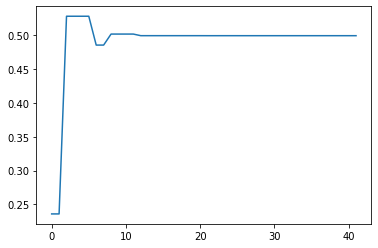

In [ ]:
#Gráfica para los puntos en X1
plt.plot(X1)

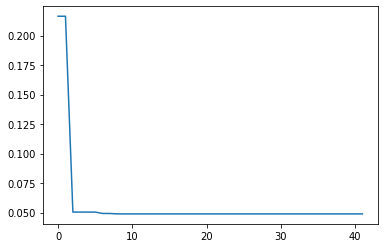

In [ ]:
#Gráfica para f(X1)
plt.plot(g(np.array(X1)))

Apliquemos ahora el método de Brent para la lista $X2$:

In [ ]:
res2.success=False
iter = 1
X2=[]
while res2.success == False:
    res2 = optimize.minimize_scalar(g, (-1,1), method='brent', options={"maxiter": iter})
    X2.append(res2.x)
    iter +=1

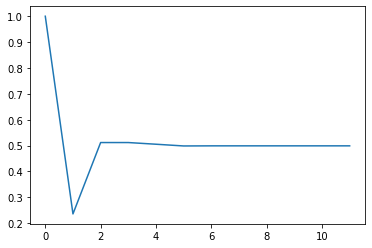

In [ ]:
#Gráfica para los puntos en X2
plt.plot(X2)

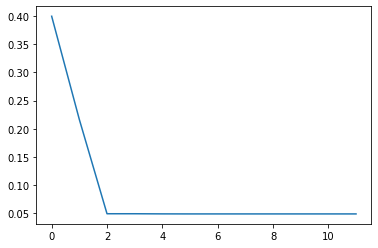

In [ ]:
#Gráfica para f(X2)
plt.plot(g(np.array(X2)))

## Error

De los arreglos para $X1$ y $X2$ realizados anteriormente vamos a tomar el último valor en la lista de cada uno el cual corresponde al valor teórico del mínimo de la función y calculamos el error para cada uno de los valores en las listas correspondientes con la fórmula
$$Error=\frac{\mid X-X_{teórico} \mid}{X_{teórico}}$$
esto da como resultado una lista de puntos que denotan la velocidad de convergencia de cada método empleado.

Realizamos primeramente los cálculos para el método de la Golden Section con la lista $X1$:

In [ ]:
Error1 = abs(np.array(X1)-X1[-1])/abs(X1[-1])
Error1

array([5.27065119e-01, 5.27065119e-01, 5.75145319e-02, 5.75145319e-02,
       5.75145319e-02, 5.75145319e-02, 2.77744892e-02, 2.77744892e-02,
       4.80301788e-03, 4.80301788e-03, 4.80301788e-03, 4.80301788e-03,
       5.00236851e-05, 5.00236851e-05, 5.00236851e-05, 5.00236851e-05,
       5.00236851e-05, 5.00236851e-05, 5.00236851e-05, 5.00236851e-05,
       5.00236851e-05, 1.25048879e-05, 1.25048879e-05, 1.13789016e-05,
       1.13789016e-05, 2.25610586e-06, 2.25610586e-06, 2.25610586e-06,
       1.02505911e-07, 1.02505911e-07, 1.02505911e-07, 1.02505911e-07,
       1.02505911e-07, 1.02505911e-07, 1.02505911e-07, 2.83319368e-08,
       2.83319368e-08, 2.83319368e-08, 1.08218370e-08, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

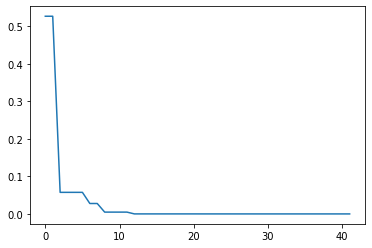

In [ ]:
#Gráfica del error Golden Section
plt.plot(Error1)

Seguidamente realizamos los mismos cálculos para el método de Brent con la lista $X2$:

In [ ]:
Error2 = abs(np.array(X2)-X2[-1])/abs(X2[-1])
Error2

array([1.00338426e+00, 5.27065086e-01, 2.54972290e-02, 2.54972290e-02,
       1.24819539e-02, 9.14855462e-04, 6.27772168e-05, 2.68239176e-06,
       1.48200336e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

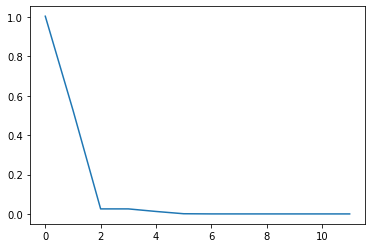

In [ ]:
#Gráfica del error Brent
plt.plot(Error2)

## Tabla de Datos

Creamos ahora una tabla que nos resuma los datos obtenidos, es decir, los valores de $x$, $f(x)$ y el error para cada iteración realizada. Para ello creamos un diccionario y seguidamente hacemos uso del comando tabulate. Se debe tener en cuenta que los datos en la tabla se escriben de manera muy aproximada.

In [ ]:
#Tabla de Datos Golden Section
Datos1 = {'Iteración': list(range(1, len(Error1)+1)), 'x': X1 , 'g(x)': g(np.array(X1)), 'Error': Error1}
print(tabulate(Datos1, headers='keys', tablefmt='fancy_grid'))

╒═════════════╤══════════╤═══════════╤═════════════╕
│   Iteración │        x │      g(x) │       Error │
╞═════════════╪══════════╪═══════════╪═════════════╡
│           1 │ 0.236068 │ 0.216426  │ 0.527065    │
├─────────────┼──────────┼───────────┼─────────────┤
│           2 │ 0.236068 │ 0.216426  │ 0.527065    │
├─────────────┼──────────┼───────────┼─────────────┤
│           3 │ 0.527864 │ 0.0503714 │ 0.0575145   │
├─────────────┼──────────┼───────────┼─────────────┤
│           4 │ 0.527864 │ 0.0503714 │ 0.0575145   │
├─────────────┼──────────┼───────────┼─────────────┤
│           5 │ 0.527864 │ 0.0503714 │ 0.0575145   │
├─────────────┼──────────┼───────────┼─────────────┤
│           6 │ 0.527864 │ 0.0503714 │ 0.0575145   │
├─────────────┼──────────┼───────────┼─────────────┤
│           7 │ 0.485292 │ 0.0491938 │ 0.0277745   │
├─────────────┼──────────┼───────────┼─────────────┤
│           8 │ 0.485292 │ 0.0491938 │ 0.0277745   │
├─────────────┼──────────┼───────────┼────────

In [ ]:
#Tabla de Datos Brent
Datos2 = {'Iteración': list(range(1, len(Error2)+1)), 'x': X2 , 'g(x)': g(np.array(X2)), 'Error': Error2}
print(tabulate(Datos2, headers='keys', tablefmt='fancy_grid'))

╒═════════════╤══════════╤═══════════╤═════════════╕
│   Iteración │        x │      g(x) │       Error │
╞═════════════╪══════════╪═══════════╪═════════════╡
│           1 │ 1        │ 0.399717  │ 1.00338     │
├─────────────┼──────────┼───────────┼─────────────┤
│           2 │ 0.236068 │ 0.216426  │ 0.527065    │
├─────────────┼──────────┼───────────┼─────────────┤
│           3 │ 0.511882 │ 0.0491272 │ 0.0254972   │
├─────────────┼──────────┼───────────┼─────────────┤
│           4 │ 0.511882 │ 0.0491272 │ 0.0254972   │
├─────────────┼──────────┼───────────┼─────────────┤
│           5 │ 0.505386 │ 0.0488922 │ 0.012482    │
├─────────────┼──────────┼───────────┼─────────────┤
│           6 │ 0.498699 │ 0.048818  │ 0.000914855 │
├─────────────┼──────────┼───────────┼─────────────┤
│           7 │ 0.499124 │ 0.0488176 │ 6.27772e-05 │
├─────────────┼──────────┼───────────┼─────────────┤
│           8 │ 0.499157 │ 0.0488176 │ 2.68239e-06 │
├─────────────┼──────────┼───────────┼────────

## Tasa de cambio

Habiendo estudiado ambos métodos nos vemos interesados en comprar sus tasas, para ello utilizamos los valores hallados en las listas $X1$ y $X2$ para crear una nueva lista de tasas $T$.

In [ ]:
#Se realizan las listas Y1 y Y2 con el valor absoluto de la diferencia de los valores obtenidos en
#X1 y X2 con sus respectivos valores teóricos

#Método de Golden Section
Y1=abs(np.array(X1)-X1[-1])

#Método de Brent
Y2=abs(np.array(X2)-X2[-1])

Creamos la lista de tasas $T1$ para el método de la Golden Section, graficamos los puntos encontrados y comparamos la gráfica con el número áureo:

[1.0, 0.10912225037496923, 1.0, 1.0, 1.0, 0.4829125490280839, 1.0, 0.17292911660957094, 1.0, 1.0, 1.0, 0.010415052844748815, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.24997934191544371, 1.0, 0.9099563114075225, 1.0, 0.19827096928766932, 1.0, 1.0, 0.045434885252034436, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.27639320121982947, 1.0, 1.0, 0.3819660134657553, 0.0, nan, nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


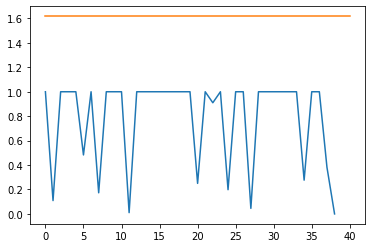

In [ ]:
T1=[]
for i in range(len(Y1)-1):
  t1=Y1[i+1]/Y1[i]
  T1.append(t1)
print(T1)
p=(1+np.sqrt(5))/2
plt.plot(T1)
plt.plot(p*np.ones(len(T1)))

Creamos la lista de tasas $T2$ para el método de Brent, graficamos los puntos encontrados y comparamos la gráfica con el número áureo:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


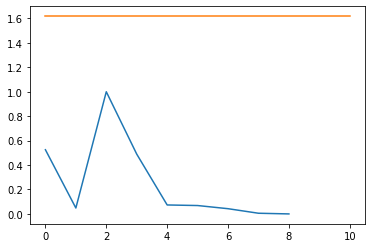

In [ ]:
T2=[]
for i in range(len(Y2)-1):
  t2=Y2[i+1]/Y2[i]
  T2.append(t2)

p=(1+np.sqrt(5))/2
plt.plot(T2)
plt.plot(p*np.ones(len(T2)))

# Conclusiones

1. La tasa de cambio en el método de la Golden Section se mantiene constante excepto por algunos casos, manteniendose siempre por debajo del número áureo.
2. Aplicar el método de Brent resulta ser mas práctico, pues su convergencia es mas rápida y en menos número de iteraciones
3. La tasa de cambio del método de Brent presenta un cambio brusco en las primeras iteraciones y luego empieza a decrecer lentamente indicando que se está acercando cada vez mas al valor requerido haciendo un cambio mínimo en los puntos. 

# Referencias y Bibliografía

1. Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.
2. Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.